In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

In [9]:
ecomm_data = pd.read_csv('datasets/E-commerce.csv', index_col=0)
ecomm_data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16897,1104,35,5,1,0,General,Dresses,Dresses
4356,1078,43,5,1,0,General,Dresses,Dresses
13324,1038,49,2,1,0,General Petite,Bottoms,Jeans
18859,1033,39,5,1,0,General,Bottoms,Jeans
17186,974,69,5,1,1,General,Jackets,Jackets
15566,941,54,5,1,0,General Petite,Tops,Sweaters
18961,820,25,5,1,0,General,Tops,Blouses
19850,1039,39,3,1,5,General,Bottoms,Jeans
3988,1055,39,4,1,8,General Petite,Bottoms,Pants
365,862,38,4,1,0,General,Tops,Knits


In [10]:
ecomm_data.shape

(23472, 8)

In [11]:
ecomm_data = ecomm_data[['Recommended IND', 'Rating']]

In [12]:
ecomm_data.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

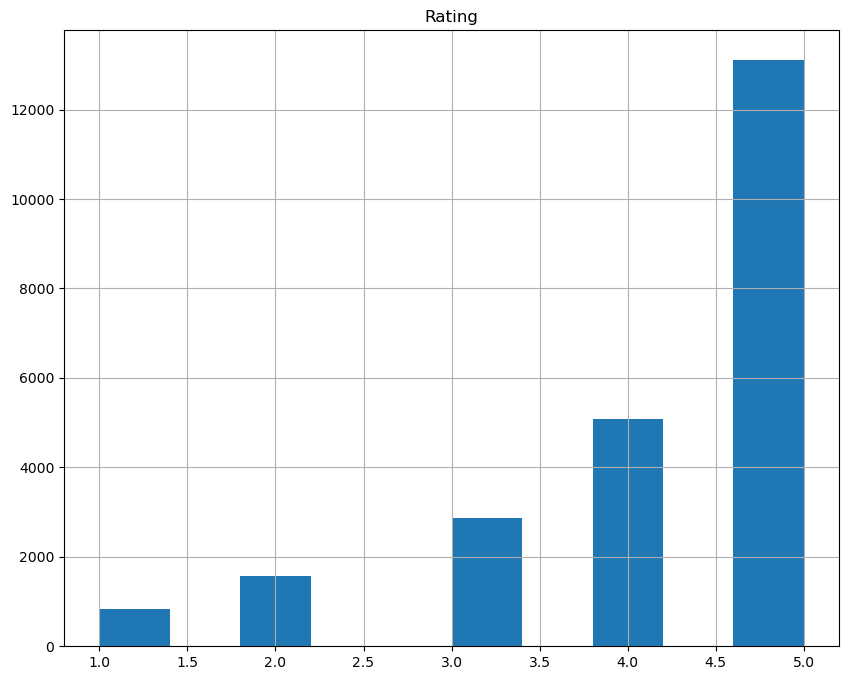

In [13]:
ecomm_data[['Rating']].hist(figsize=(10,8))

In [16]:
df_for_obs = pd.crosstab(ecomm_data['Recommended IND'], ecomm_data['Rating'])

df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


In [17]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

In [18]:
print('Chi2 stats: {}'.format(round(chi2, 3)))

Chi2 stats: 16711.664


In [19]:
print('The p-values: {}'.format(p_value))

The p-values: 0.0


In [20]:
print('The degree of freedom: {}'.format(degrees_of_freedom))

The degree of freedom: 4


In [22]:
expected_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [23]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1],
})

In [24]:
expected_df

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


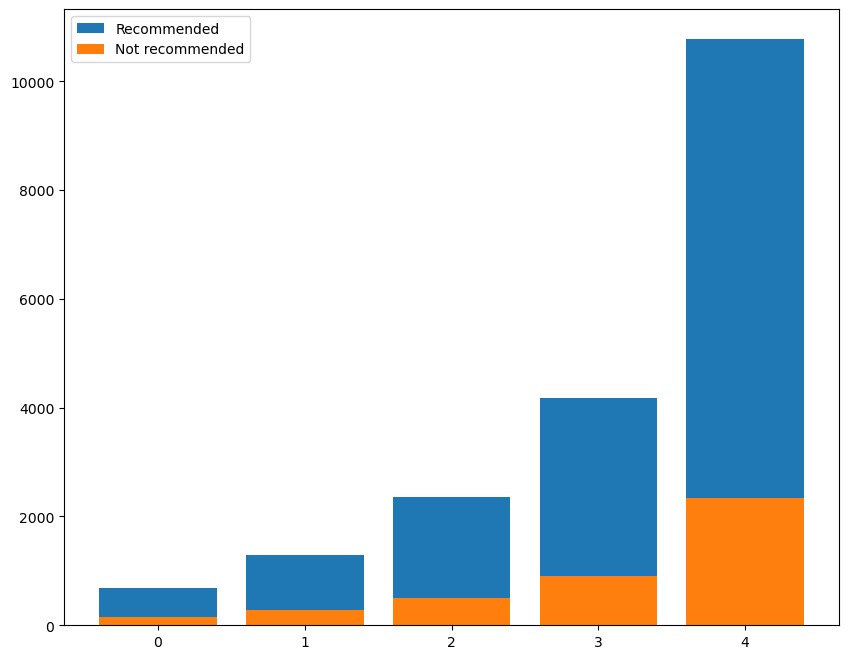

In [26]:
plt.figure(figsize=(10,8))

plt.bar(expected_df.index, expected_df['1'], label='Recommended')
plt.bar(expected_df.index, expected_df['0'], label='Not recommended')

plt.legend()

In [28]:
ratings_recommended = ecomm_data[ecomm_data['Recommended IND'] == 1]

ratings_not_recommended = ecomm_data[ecomm_data['Recommended IND'] == 0]

In [29]:
ratings_recommended.shape, ratings_not_recommended.shape

((19300, 2), (4172, 2))

In [30]:
ratings_recommended.sample(10)

,Recommended IND,Rating
14363,1,4
17555,1,5
12506,1,4
18764,1,4
20684,1,5
6052,1,3
23435,1,4
3542,1,5
8111,1,5
14370,1,4
